# Expedia Hotel Recommendations

#### Which hotel type will an Expedia customer book?

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [4]:
import warnings
warnings.filterwarnings('ignore')

### Reading training data (train.csv)

In [5]:
# train_data = pd.read_csv("train.csv", sep = ",", nrows = 100000)
train_data = pd.read_csv("train.csv", sep = ",")

### Getting familiar with the data and Exploratory Data Analysis

In [4]:
train_data.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [5]:
train_data.shape

(37670293, 24)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37670293 entries, 0 to 37670292
Data columns (total 24 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   date_time                  object 
 1   site_name                  int64  
 2   posa_continent             int64  
 3   user_location_country      int64  
 4   user_location_region       int64  
 5   user_location_city         int64  
 6   orig_destination_distance  float64
 7   user_id                    int64  
 8   is_mobile                  int64  
 9   is_package                 int64  
 10  channel                    int64  
 11  srch_ci                    object 
 12  srch_co                    object 
 13  srch_adults_cnt            int64  
 14  srch_children_cnt          int64  
 15  srch_rm_cnt                int64  
 16  srch_destination_id        int64  
 17  srch_destination_type_id   int64  
 18  is_booking                 int64  
 19  cnt                        int64  
 20  

In [7]:
train_data.describe()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07,2.414529e+07,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07,...,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07,3.767029e+07
mean,9.795271e+00,2.680473e+00,8.610880e+01,3.084060e+02,2.775304e+04,1.970090e+03,6.044518e+05,1.349265e-01,2.489042e-01,5.870761e+00,...,3.321222e-01,1.112663e+00,1.444109e+04,2.582280e+00,7.965675e-02,1.483384e+00,3.156305e+00,8.129685e+01,6.004619e+02,4.980861e+01
std,1.196754e+01,7.480393e-01,5.924310e+01,2.084437e+02,1.678255e+04,2.232442e+03,3.506175e+05,3.416451e-01,4.323782e-01,3.717095e+00,...,7.314981e-01,4.591155e-01,1.106630e+04,2.153019e+00,2.707611e-01,1.219776e+00,1.623189e+00,5.617119e+01,5.117391e+02,2.891595e+01
min,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.600000e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.000000e+00,6.600000e+01,1.740000e+02,1.300900e+04,3.131670e+02,2.989100e+05,0.000000e+00,0.000000e+00,2.000000e+00,...,0.000000e+00,1.000000e+00,8.267000e+03,1.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,5.000000e+01,1.600000e+02,2.500000e+01
50%,2.000000e+00,3.000000e+00,6.600000e+01,3.140000e+02,2.765500e+04,1.140491e+03,6.039140e+05,0.000000e+00,0.000000e+00,9.000000e+00,...,0.000000e+00,1.000000e+00,9.147000e+03,1.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,5.000000e+01,5.930000e+02,4.900000e+01
75%,1.400000e+01,3.000000e+00,7.000000e+01,3.850000e+02,4.241300e+04,2.552599e+03,9.101680e+05,0.000000e+00,0.000000e+00,9.000000e+00,...,0.000000e+00,1.000000e+00,1.879000e+04,5.000000e+00,0.000000e+00,2.000000e+00,4.000000e+00,1.060000e+02,7.010000e+02,7.300000e+01
max,5.300000e+01,4.000000e+00,2.390000e+02,1.027000e+03,5.650800e+04,1.240790e+04,1.198785e+06,1.000000e+00,1.000000e+00,1.000000e+01,...,9.000000e+00,8.000000e+00,6.510700e+04,9.000000e+00,1.000000e+00,2.690000e+02,6.000000e+00,2.120000e+02,2.117000e+03,9.900000e+01


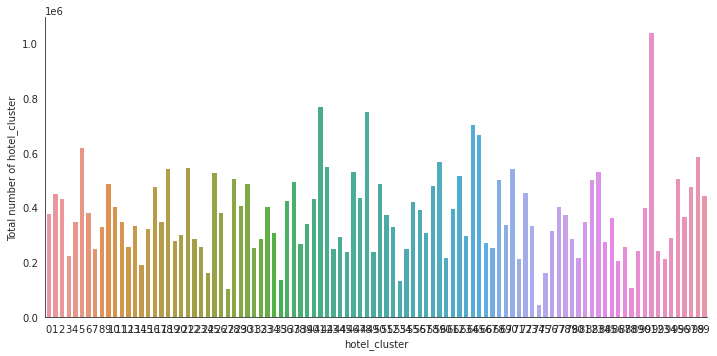

In [9]:
with sns.axes_style('white'):
    g = sns.factorplot("hotel_cluster", data=train_data, aspect=2.0,kind='count')
    g.set_ylabels("Total number of hotel_cluster")

## Importing Destination data

In [6]:
destination_data = pd.read_csv("destinations.csv", sep=',')

In [7]:
destination_data.head()

,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
0,0,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-1.897627,...,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657
1,1,-2.181690,-2.181690,-2.181690,-2.082564,-2.181690,-2.165028,-2.181690,-2.181690,-2.031597,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
2,2,-2.183490,-2.224164,-2.224164,-2.189562,-2.105819,-2.075407,-2.224164,-2.118483,-2.140393,...,-2.224164,-2.224164,-2.196379,-2.224164,-2.192009,-2.224164,-2.224164,-2.224164,-2.224164,-2.057548
3,3,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.115485,-2.177409,-2.177409,-2.177409,...,-2.161081,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409
4,4,-2.189562,-2.187783,-2.194008,-2.171153,-2.152303,-2.056618,-2.194008,-2.194008,-2.145911,...,-2.187356,-2.194008,-2.191779,-2.194008,-2.194008,-2.185161,-2.194008,-2.194008,-2.194008,-2.188037


### Applying PCA to get 10 most relevant dimensions

In [8]:
model = PCA(n_components=None).fit(destination_data)
destination_data_pc = model.transform(destination_data)
destination_data_pc

array([[-3.23594639e+04,  3.91171508e-02,  1.83897680e-01, ...,
        -8.95076187e-04,  2.72242521e-05, -1.38904284e-06],
       [-3.23584639e+04, -3.56569311e-01,  9.17178951e-02, ...,
         1.90740877e-04, -2.29089126e-04,  8.45786956e-05],
       [-3.23574639e+04,  8.63287331e-02,  3.66722352e-02, ...,
        -2.13700576e-03,  1.87017759e-03, -2.20432977e-04],
       ...,
       [ 3.26315361e+04,  8.05617083e-02,  1.92824073e-01, ...,
        -5.68538143e-04, -1.21487882e-04,  1.58066944e-04],
       [ 3.26325361e+04, -6.66110376e-01, -4.38087800e-02, ...,
        -4.00914640e-05,  2.20538540e-04, -1.60722688e-05],
       [ 3.26335361e+04, -4.61482798e-01, -2.75790500e-02, ...,
        -4.96164892e-04, -1.61638319e-04,  3.60342984e-05]])

In [9]:
number_features= model.components_.shape[0]
number_features

150

### Most important feature index on each component

In [10]:
most_related_column = [np.abs(model.components_[i]).argmax() for i in range(number_features)]
print(most_related_column)

[0, 37, 9, 58, 108, 6, 108, 20, 108, 88, 6, 20, 71, 94, 71, 53, 6, 66, 53, 43, 136, 103, 103, 53, 14, 77, 136, 141, 114, 132, 55, 136, 55, 44, 13, 44, 122, 122, 11, 110, 11, 83, 76, 21, 17, 78, 146, 17, 129, 137, 126, 126, 75, 126, 129, 34, 34, 10, 142, 47, 47, 22, 102, 2, 25, 96, 35, 4, 35, 36, 61, 61, 30, 73, 36, 1, 109, 96, 127, 50, 1, 98, 127, 134, 30, 82, 48, 32, 69, 81, 105, 81, 81, 85, 59, 68, 32, 8, 38, 143, 42, 62, 39, 62, 54, 144, 124, 26, 104, 67, 89, 120, 125, 107, 100, 46, 19, 3, 145, 133, 63, 64, 63, 28, 95, 111, 95, 148, 117, 97, 52, 31, 40, 118, 12, 140, 86, 119, 86, 60, 90, 113, 70, 15, 23, 116, 123, 72, 72, 135]


In [11]:
initial_column= ['srch_destination_id', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10', 'd11', 'd12', 'd13', 'd14', 'd15', 'd16', 'd17', 'd18', 'd19', 'd20', 'd21', 'd22', 'd23', 'd24', 'd25', 'd26', 'd27', 'd28', 'd29', 'd30', 'd31', 'd32', 'd33', 'd34', 'd35', 'd36', 'd37', 'd38', 'd39', 'd40', 'd41', 'd42', 'd43', 'd44', 'd45', 'd46', 'd47', 'd48', 'd49', 'd50', 'd51', 'd52', 'd53', 'd54', 'd55', 'd56', 'd57', 'd58', 'd59', 'd60', 'd61', 'd62', 'd63', 'd64', 'd65', 'd66', 'd67', 'd68', 'd69', 'd70', 'd71', 'd72', 'd73', 'd74', 'd75', 'd76', 'd77', 'd78', 'd79', 'd80', 'd81', 'd82', 'd83', 'd84', 'd85', 'd86', 'd87', 'd88', 'd89', 'd90', 'd91', 'd92', 'd93', 'd94', 'd95', 'd96', 'd97', 'd98', 'd99','d100','d101','d102','d103','d104','d105','d106', 'd107','d108','d109','d110','d111','d112','d113','d114','d115', 'd116','d117','d118','d119','d120','d121','d122','d123','d124','d125','d126','d127','d128','d129','d130','d131','d132','d133','d134','d135','d136','d137','d138','d139','d140','d141','d142','d143', 'd144','d145','d146','d147','d148','d149']

### Get the names of most important features

In [12]:
most_relevant_column_names = [initial_column[most_related_column[i]] for i in range(number_features)]

In [13]:
dic = {'PC{}'.format(i): most_relevant_column_names[i] for i in range(number_features)}

### Building Dataframe

In [14]:
relevant_column = pd.DataFrame(dic.items())

In [15]:
relevant_column.head(20)

,0,1
0,PC0,srch_destination_id
1,PC1,d37
2,PC2,d9
3,PC3,d58
4,PC4,d108
5,PC5,d6
6,PC6,d108
7,PC7,d20
8,PC8,d108
9,PC9,d88


### Merging top 10 most important and correlated columns

In [16]:
train_data = pd.merge(train_data,destination_data[['srch_destination_id','d37', 'd9', 'd58', 'd108', 'd6', 'd108', 'd20', 'd108', 'd88', 'd71']],on='srch_destination_id')

### Correlation Matrix

In [17]:
train_data_copy = train_data.copy()
train_data_copy.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster', 'd37', 'd9', 'd58', 'd108', 'd6', 'd108', 'd20',
       'd108', 'd88', 'd71'],
      dtype='object')

In [18]:
train_data_copy= train_data_copy.drop(['d37', 'd9', 'd58', 'd108', 'd6', 'd20', 'd88', 'd71'],axis=1)
# train_data_copy= train_data_copy.drop(['d9'],axis=1)
# train_data_copy= train_data_copy.drop(['d58'],axis=1)
# train_data_copy= train_data_copy.drop(['d108'],axis=1)
# train_data_copy= train_data_copy.drop(['d6'],axis=1)
# train_data_copy= train_data_copy.drop(['d20'],axis=1)
# train_data_copy= train_data_copy.drop(['d88'],axis=1)
# train_data_copy= train_data_copy.drop(['d71'],axis=1)

<AxesSubplot:>

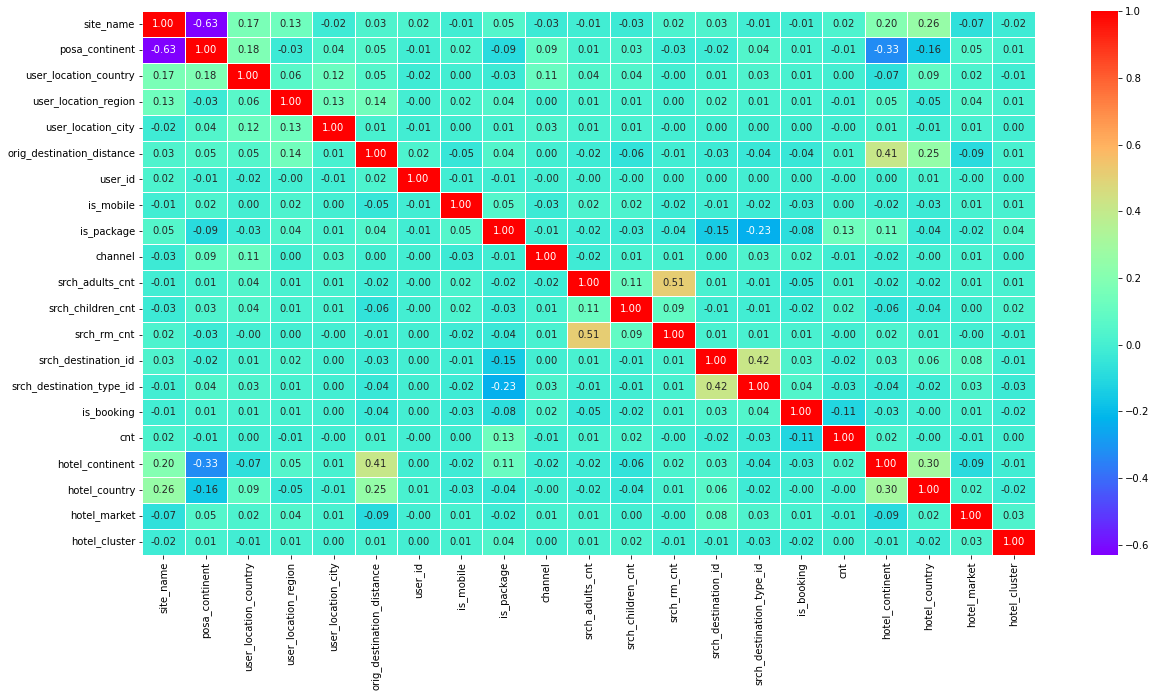

In [19]:
corr = train_data_copy.corr()
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(round(corr, 2).iloc[:, :], annot=True, linewidths=.5, ax=ax, cmap="rainbow",fmt='.2f')

In [20]:
user_dist_matrix = 1 - corr.T.corr()

### Most number of hotels in the Country

<AxesSubplot:xlabel='hotel_continent', ylabel='count'>

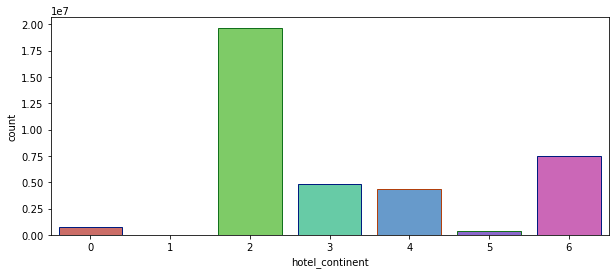

In [25]:
plt.figure(figsize=(10, 4))
sns.countplot(x='hotel_continent', palette='hls',data=train_data, edgecolor=sns.color_palette("dark", 3))

### User Location Country

<AxesSubplot:xlabel='user_location_country', ylabel='count'>

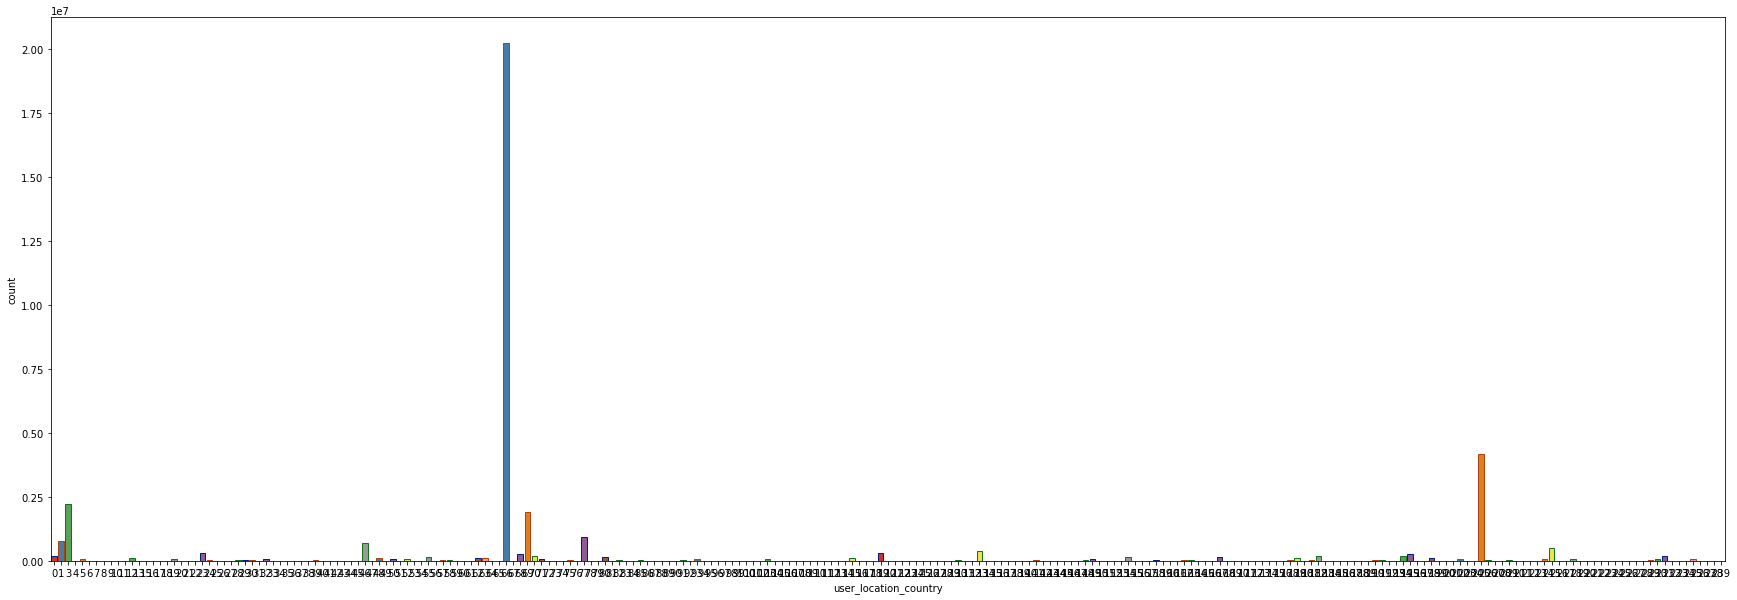

In [26]:
plt.figure(figsize=(30, 10))
sns.countplot(x=train_data['user_location_country'],palette="Set1", edgecolor=sns.color_palette("dark", 3))

### Top 10 User Countries

In [27]:
top_ten_user_countries = train_data.groupby('user_location_country')['user_location_region'].count().sort_values(ascending=False)[:10]

In [28]:
top_ten_user_countries

user_location_country
66     20244919
205     4174435
3       2208620
69      1924689
77       946400
1        775473
46       717000
215      493716
133      398399
23       313317
Name: user_location_region, dtype: int64

### Total Number of Bookings over Date

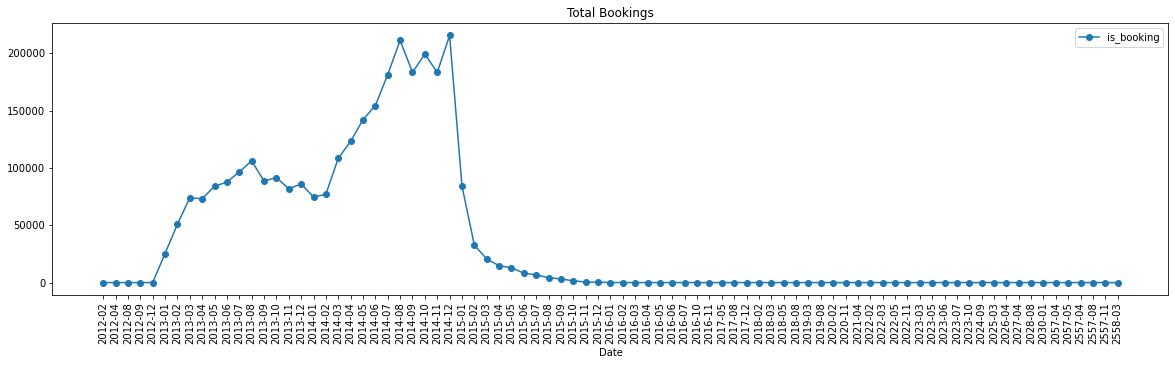

In [29]:
train_data['Date']  = train_data['srch_ci'].apply(lambda x: (str(x)[:7]) if x == x else np.nan)
date_bookings  = train_data.groupby('Date')["is_booking"].sum()
ax1 = date_bookings.plot(legend=True,marker='o',title="Total Bookings", figsize=(20,5)) 
ax1.set_xticks(range(len(date_bookings)))
xlabels = ax1.set_xticklabels(date_bookings.index.tolist(), rotation=90)

### Creating a new dataframe with user_id, hotel_cluster and is_booking fields

In [21]:
new_df = train_data[['user_id', 'hotel_cluster', 'is_booking']]

In [22]:
new_df.head()

,user_id,hotel_cluster,is_booking
0,12,1,0
1,12,1,1
2,12,1,0
3,776,24,0
4,3313,45,0


In [23]:
new_df.columns = ['user_id', 'hotel_id', 'booking']
new_df = new_df.sort_values(['user_id', 'hotel_id'])
new_df = new_df.reset_index().drop('index', axis = 1)
new_df.head()

,user_id,hotel_id,booking
0,0,19,0
1,0,28,0
2,0,40,0
3,0,56,0
4,0,72,0


In [24]:
booked_hotels = new_df.groupby(['user_id', 'hotel_id']).booking.transform(max)
new_df = new_df.loc[new_df.booking == booked_hotels]
new_df.drop_duplicates(keep = 'first', inplace = True)
new_df= new_df.reset_index().drop('index', axis = 1)
new_df.head()

,user_id,hotel_id,booking
0,0,19,0
1,0,28,0
2,0,40,0
3,0,56,0
4,0,72,0


### Calculated each of the hotel cluster's mean to find similar hotel clusters

In [25]:
bookings = pd.DataFrame(new_df.groupby(['hotel_id'])['booking'].mean())
bookings

,booking
hotel_id,
0,0.113081
1,0.262545
2,0.204332
3,0.085733
4,0.172588
...,...
95,0.216175
96,0.093719
97,0.133088


In [26]:
bookings['number_of_bookings'] = pd.DataFrame(new_df.groupby('hotel_id')['booking'].count())
bookings.head()

,booking,number_of_bookings
hotel_id,,
0,0.113081,146559
1,0.262545,114624
2,0.204332,173115
3,0.085733,121482
4,0.172588,166831


In [27]:
bookings_matrix = new_df.pivot_table(index = 'user_id', columns = 'hotel_id', values = 'booking')
bookings_matrix.head()

hotel_id,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
3,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
bookings_matrix = bookings_matrix.fillna(0)
bookings_matrix

hotel_id,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1198782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1198783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Finding similar hotel clusters

In [29]:
def find_similar_hotel_clusters(hotel_cluster): 
    item_user_bookings = bookings_matrix[hotel_cluster]
    hotel_correlation = bookings_matrix.corrwith(item_user_bookings)
    corr_clusterid = pd.DataFrame(hotel_correlation, columns=['correlation_value'])
    corr_clusterid.loc[~(corr_clusterid==0).all(axis=1)]
    corr_clusterid = corr_clusterid.round({'correlation_value': 2})
    return corr_clusterid.sort_values('correlation_value',ascending=False).head(n = 5)

In [30]:
find_similar_hotel_clusters(11)

,correlation_value
hotel_id,
11,1.00
46,0.12
82,0.12
64,0.11
25,0.11


### What are we predicting?

#### The objective is to predict which hotel_cluster a user will book given the information in their search. There are 100 clusters in total.

<AxesSubplot:>

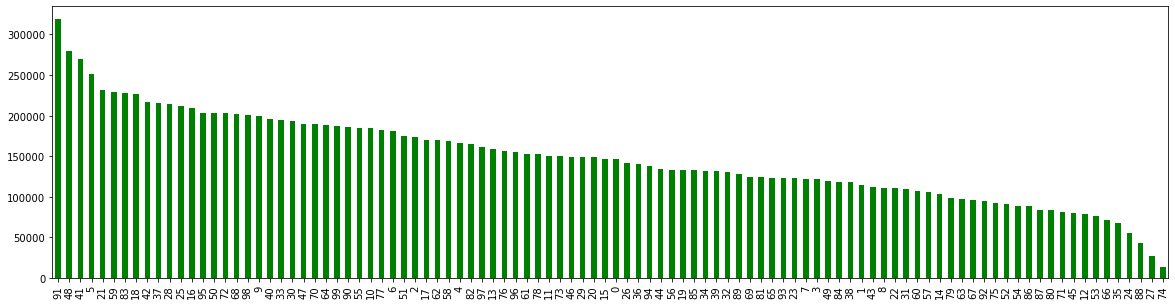

In [40]:
new_df['hotel_id'].value_counts().plot(kind='bar',color="green",figsize=(20,5))

## Collaborative Filtering using Cosine Similarity

In [31]:
users_count, hotels_count = new_df.user_id.unique().shape[0], new_df.hotel_id.unique().shape[0]

In [32]:
print("The no of unique users = ",users_count)
print("The no of hotel clusters = ",hotels_count)

The no of unique users =  1198152
The no of hotel clusters =  100


In [33]:
def map_ids_to_idx(df):
    user_idx = np.arange(0, users_count)
    hotel_idx = np.arange(0, hotels_count)
    
    idx_user_df = pd.DataFrame(df.user_id.unique(), columns=["user"])
    idx_user_df["idx"] = user_idx
    
    idx_hotel_df = pd.DataFrame(df.hotel_id.unique(), columns=["hotel"])
    idx_hotel_df["idx"] = hotel_idx
    
    df["hotel_index"] = df["hotel_id"].map(idx_hotel_df.set_index('hotel')["idx"]).fillna(0)
    df["user_index"] = df["user_id"].map(idx_user_df.set_index('user')["idx"]).fillna(0)

    return df

In [34]:
new_df = map_ids_to_idx(new_df)
new_df

,user_id,hotel_id,booking,hotel_index,user_index
0,0,19,0,0,0
1,0,28,0,1,0
2,0,40,0,2,0
3,0,56,0,3,0
4,0,72,0,4,0
...,...,...,...,...,...
14818384,1198784,26,0,54,1198150
14818385,1198784,68,0,12,1198150
14818386,1198784,79,1,51,1198150
14818387,1198784,95,0,16,1198150


### Splitting the data into training and testing

In [35]:
train_data, test_data = train_test_split(new_df, test_size = 0.3)

In [36]:
utility_matrix = np.zeros((users_count, hotels_count))
for row in new_df.itertuples():
    utility_matrix[row[5], row[4]] = row[3]
utility_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
train_data_copy = train_data_copy.drop(['date_time', 'user_id', 'srch_ci', 'srch_co', 'site_name'], axis=1)

In [38]:
train_data_copy = train_data_copy.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [39]:
data = pd.get_dummies(train_data_copy)
print(data.shape)

(24035827, 19)


In [40]:
Y = data['hotel_cluster']
X = data.drop(['hotel_cluster'],axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24035827 entries, 0 to 37503313
Data columns (total 18 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   posa_continent             int64  
 1   user_location_country      int64  
 2   user_location_region       int64  
 3   user_location_city         int64  
 4   orig_destination_distance  float64
 5   is_mobile                  int64  
 6   is_package                 int64  
 7   channel                    int64  
 8   srch_adults_cnt            int64  
 9   srch_children_cnt          int64  
 10  srch_rm_cnt                int64  
 11  srch_destination_id        int64  
 12  srch_destination_type_id   int64  
 13  is_booking                 int64  
 14  cnt                        int64  
 15  hotel_continent            int64  
 16  hotel_country              int64  
 17  hotel_market               int64  
dtypes: float64(1), int64(17)
memory usage: 3.4 GB


In [41]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.3, random_state=101)

### Creating utility matrix for training data and testing data

In [54]:
train_utility_matrix = np.zeros((users_count, hotels_count))
for row in train_data.itertuples():
    train_utility_matrix[row[5], row[4]] = row[3]
train_utility_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [55]:
test_utility_matrix = np.zeros((users_count, hotels_count))
for row in test_data.itertuples():
    test_utility_matrix[row[5], row[4]] = row[3]
test_utility_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Calculating the cosine similarity

In [ ]:
similarity_btw_users = pairwise_distances(train_utility_matrix, metric = 'cosine')
similarity_btw_users

In [ ]:
transpose_utility_matrix = train_utility_matrix.T
similarity_btw_items = pairwise_distances(transpose_utility_matrix, metric = 'cosine')
similarity_btw_items

### Performing predictions based on cosine similarity

In [ ]:
def user_prediction(matrix, similarity_measure):
    avg_user_booking = matrix.mean(axis = 1)
    diff_of_bookings = (matrix - avg_user_booking[:, np.newaxis])
    pred = avg_user_booking[:, np.newaxis] + similarity_measure.dot(diff_of_bookings) / np.array([np.abs(similarity_measure).sum(axis=1)]).T
    return pred

In [ ]:
user_pred = user_prediction(train_utility_matrix, similarity_btw_users)

In [ ]:
user_pred

In [ ]:
def item_prediction(matrix, similarity_measure):
    pred = matrix.dot(similarity_measure) / np.array([np.abs(similarity_measure).sum(axis=1)])
    return pred

In [ ]:
item_pred = item_prediction(train_utility_matrix, similarity_btw_items)

In [ ]:
item_pred.shape

In [ ]:
def rmse_value(predicted, test):
    predicted = predicted[test.nonzero()].flatten()
    test = test[test.nonzero()].flatten()
    return sqrt(mean_squared_error(predicted, test))

def mae_value(predicted, test):
    predicted = predicted[test.nonzero()].flatten()
    test = test[test.nonzero()].flatten()
    return sqrt(mean_absolute_error(predicted, test))

#### The RMSE and MAE of user based CF 

In [ ]:
print("RMSE = ", rmse_value(user_pred, test_utility_matrix))
print("MAE = ", mae_value(user_pred, test_utility_matrix))

#### The RMSE and MAE of item based CF

In [ ]:
print("RMSE = ", rmse_value(item_pred, test_utility_matrix))
print("MAE = ", mae_value(item_pred, test_utility_matrix))

In [ ]:
https://github.com/ShrutiSavardekar/ExpediaHotelRecommendation.git

## ML algorithm: GaussianNB

In [42]:
mnb = GaussianNB()
mnb.fit(X_train,y_train) 
y_predict = mnb.predict(X_val)
acc=accuracy_score(y_val,y_predict)

print("Accuracy:" ,acc)
print( "confusion_matrix")
print( confusion_matrix(y_val, y_predict))
from sklearn.metrics import classification_report
print(classification_report(y_val, y_predict))

Accuracy: 0.07022945882598326
confusion_matrix
[[13776  1040    10 ...   701   321     2]
 [    0 88997     0 ...    77     3     0]
 [  646     0    57 ...  4441  1007   264]
 ...
 [ 2754     0    35 ...  7126   268    77]
 [ 7386     0    32 ...  2090  1070   628]
 [  670   206    45 ...  3533   494   122]]
              precision    recall  f1-score   support

           0       0.06      0.16      0.09     86644
           1       0.25      0.85      0.38    104857
           2       0.02      0.00      0.00     70584
           3       0.00      0.00      0.00     36476
           4       0.03      0.02      0.02     79128
           5       0.04      0.06      0.05    103033
           6       0.00      0.00      0.00     75127
           7       0.02      0.00      0.00     53917
           8       0.05      0.01      0.02     54466
           9       0.01      0.00      0.01     92595
          10       0.02      0.00      0.00     79357
          11       0.02      0.00      0

In [43]:
y_test_pred_proba = mnb.predict_proba(X_val)
sort_index = np.argsort(-y_test_pred_proba)
print(sort_index[:,:5])

[[91 48 70  4 42]
 [91 94 48 39 41]
 [65 52 87 80 31]
 ...
 [ 0 84 91 41 70]
 [45 24  1 88 79]
 [91 39 94 32 48]]


In [45]:
from sklearn import metrics
rmse_list = []
rmse_list.append(np.sqrt(metrics.mean_squared_error(y_val, y_predict)))
print(sum(rmse_list)/len(rmse_list))

41.06342168042806
